# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [23]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [24]:
#Type your code here
df = pd.read_csv("netflix_dataset.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s00000,Movie,Title 0,Director D,"Actor X, Actor Y",United Kingdom,2020-07-22 14:20:51,1954,TV-PG,30 min,Action,Sample description of the content.
1,s00001,TV Show,Title 1,Director C,"Actor M, Actor N",United Kingdom,2022-06-03 21:53:37,1991,TV-MA,14 Seasons,Documentary,Sample description of the content.
2,s00002,Movie,Title 2,Director B,"Actor X, Actor Y",South Korea,2023-03-04 12:17:51,2010,NC-17,84 min,Action,Sample description of the content.
3,s00003,Movie,Title 3,Director A,"Actor M, Actor N",United States,2020-02-24 13:31:46,1971,TV-MA,113 min,Comedy,Sample description of the content.
4,s00004,Movie,Title 4,Director B,"Actor X, Actor Y",South Korea,2021-08-28 11:14:33,1970,TV-PG,25 min,Action,Sample description of the content.


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [25]:
#Type your code here
df.shape

(1200, 12)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1200 non-null   object
 1   type          1200 non-null   object
 2   title         1200 non-null   object
 3   director      1200 non-null   object
 4   cast          1200 non-null   object
 5   country       1200 non-null   object
 6   date_added    1200 non-null   object
 7   release_year  1200 non-null   int64 
 8   rating        1200 non-null   object
 9   duration      1200 non-null   object
 10  listed_in     1200 non-null   object
 11  description   1200 non-null   object
dtypes: int64(1), object(11)
memory usage: 112.6+ KB


In [27]:
df.describe()

,release_year
count,1200.000000
mean,1986.451667
std,21.581260
min,1950.000000
25%,1968.000000
50%,1986.000000
75%,2005.000000
max,2024.000000


In [28]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [29]:
df['description'].value_counts()

,count
description,
Sample description of the content.,1200


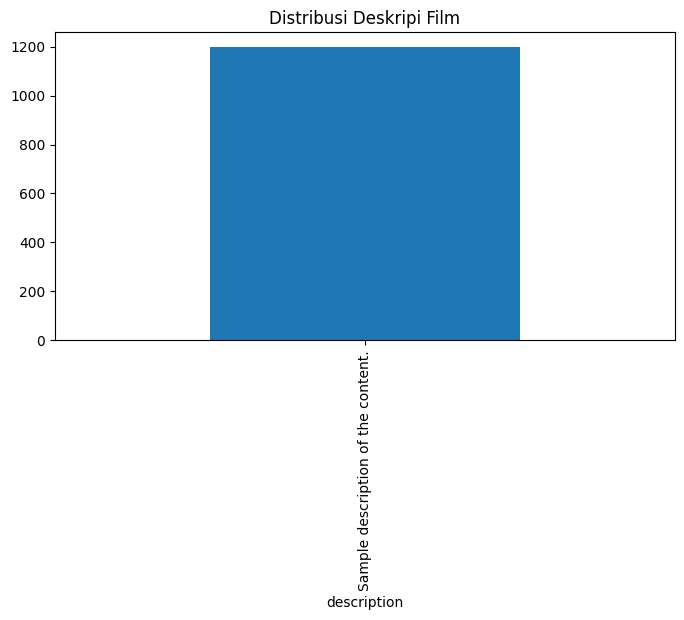

In [30]:
df['description'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("Distribusi Deskripi Film")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [33]:
#piliih kolom yang dipakai
cols_used = [
    'show_id',
    'type',
    'title',
    'description',
    'release_year',
    'rating',
    'duration',
    'listed_in'
]

df_clean = df[cols_used]
df_clean.head()

,show_id,type,title,description,release_year,rating,duration,listed_in
0,s00000,Movie,Title 0,Sample description of the content.,1954,TV-PG,30 min,Action
1,s00001,TV Show,Title 1,Sample description of the content.,1991,TV-MA,14 Seasons,Documentary
2,s00002,Movie,Title 2,Sample description of the content.,2010,NC-17,84 min,Action
3,s00003,Movie,Title 3,Sample description of the content.,1971,TV-MA,113 min,Comedy
4,s00004,Movie,Title 4,Sample description of the content.,1970,TV-PG,25 min,Action


In [38]:
#ubah nama kolom
df_clean = df_clean.rename(columns={
    'show_id': 'show_id',
    'title': 'menu_name',
    'description': 'description',
    'release_year': 'release_year',
    'rating': 'rating',
    'duration': 'duration',
    'listed_in': 'category'
})

df_clean.head()

,show_id,type,menu_name,description,release_year,rating,duration,category
0,s00000,Movie,Title 0,Sample description of the content.,1954,TV-PG,30 min,Action
1,s00001,TV Show,Title 1,Sample description of the content.,1991,TV-MA,14 Seasons,Documentary
2,s00002,Movie,Title 2,Sample description of the content.,2010,NC-17,84 min,Action
3,s00003,Movie,Title 3,Sample description of the content.,1971,TV-MA,113 min,Comedy
4,s00004,Movie,Title 4,Sample description of the content.,1970,TV-PG,25 min,Action


In [39]:
df_clean.isnull().sum()

,0
show_id,0
type,0
menu_name,0
description,0
release_year,0
rating,0
duration,0
category,0


In [40]:
#agregasi per menu
df_menu = (
    df_clean
    .groupby(['category', 'type'])
    .agg(
        avg_release_year=('release_year', 'mean'),
        total_title=('show_id', 'count')
    )
    .reset_index()
)

df_menu.head()

,category,type,avg_release_year,total_title
0,Action,Movie,1985.230769,91
1,Action,TV Show,1987.530864,81
2,Comedy,Movie,1986.860215,93
3,Comedy,TV Show,1982.041667,72
4,Documentary,Movie,1988.036145,83


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['avg_release_year', 'total_title']

df_menu[num_cols] = scaler.fit_transform(
    df_menu[num_cols]
)

df_menu.head()

,category,type,avg_release_year,total_title
0,Action,Movie,-0.583515,0.605501
1,Action,TV Show,0.551018,-0.540041
2,Comedy,Movie,0.220217,0.834609
3,Comedy,TV Show,-2.156555,-1.571029
4,Documentary,Movie,0.800250,-0.310933


In [43]:
df_menu.to_csv(
    "netflixmovie_preprocessing.csv",
    index=False
)